In [54]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300

df = pd.read_csv('data/wine.csv')

In [61]:
df['qual_cat'] = pd.cut(df['quality'], bins = [0, 4, 5, 9],
       labels = ['low', 'medium', 'high'])

In [62]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,qual_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium


In [63]:
df['qual_cat'].value_counts()

high      4113
medium    2138
low        246
Name: qual_cat, dtype: int64

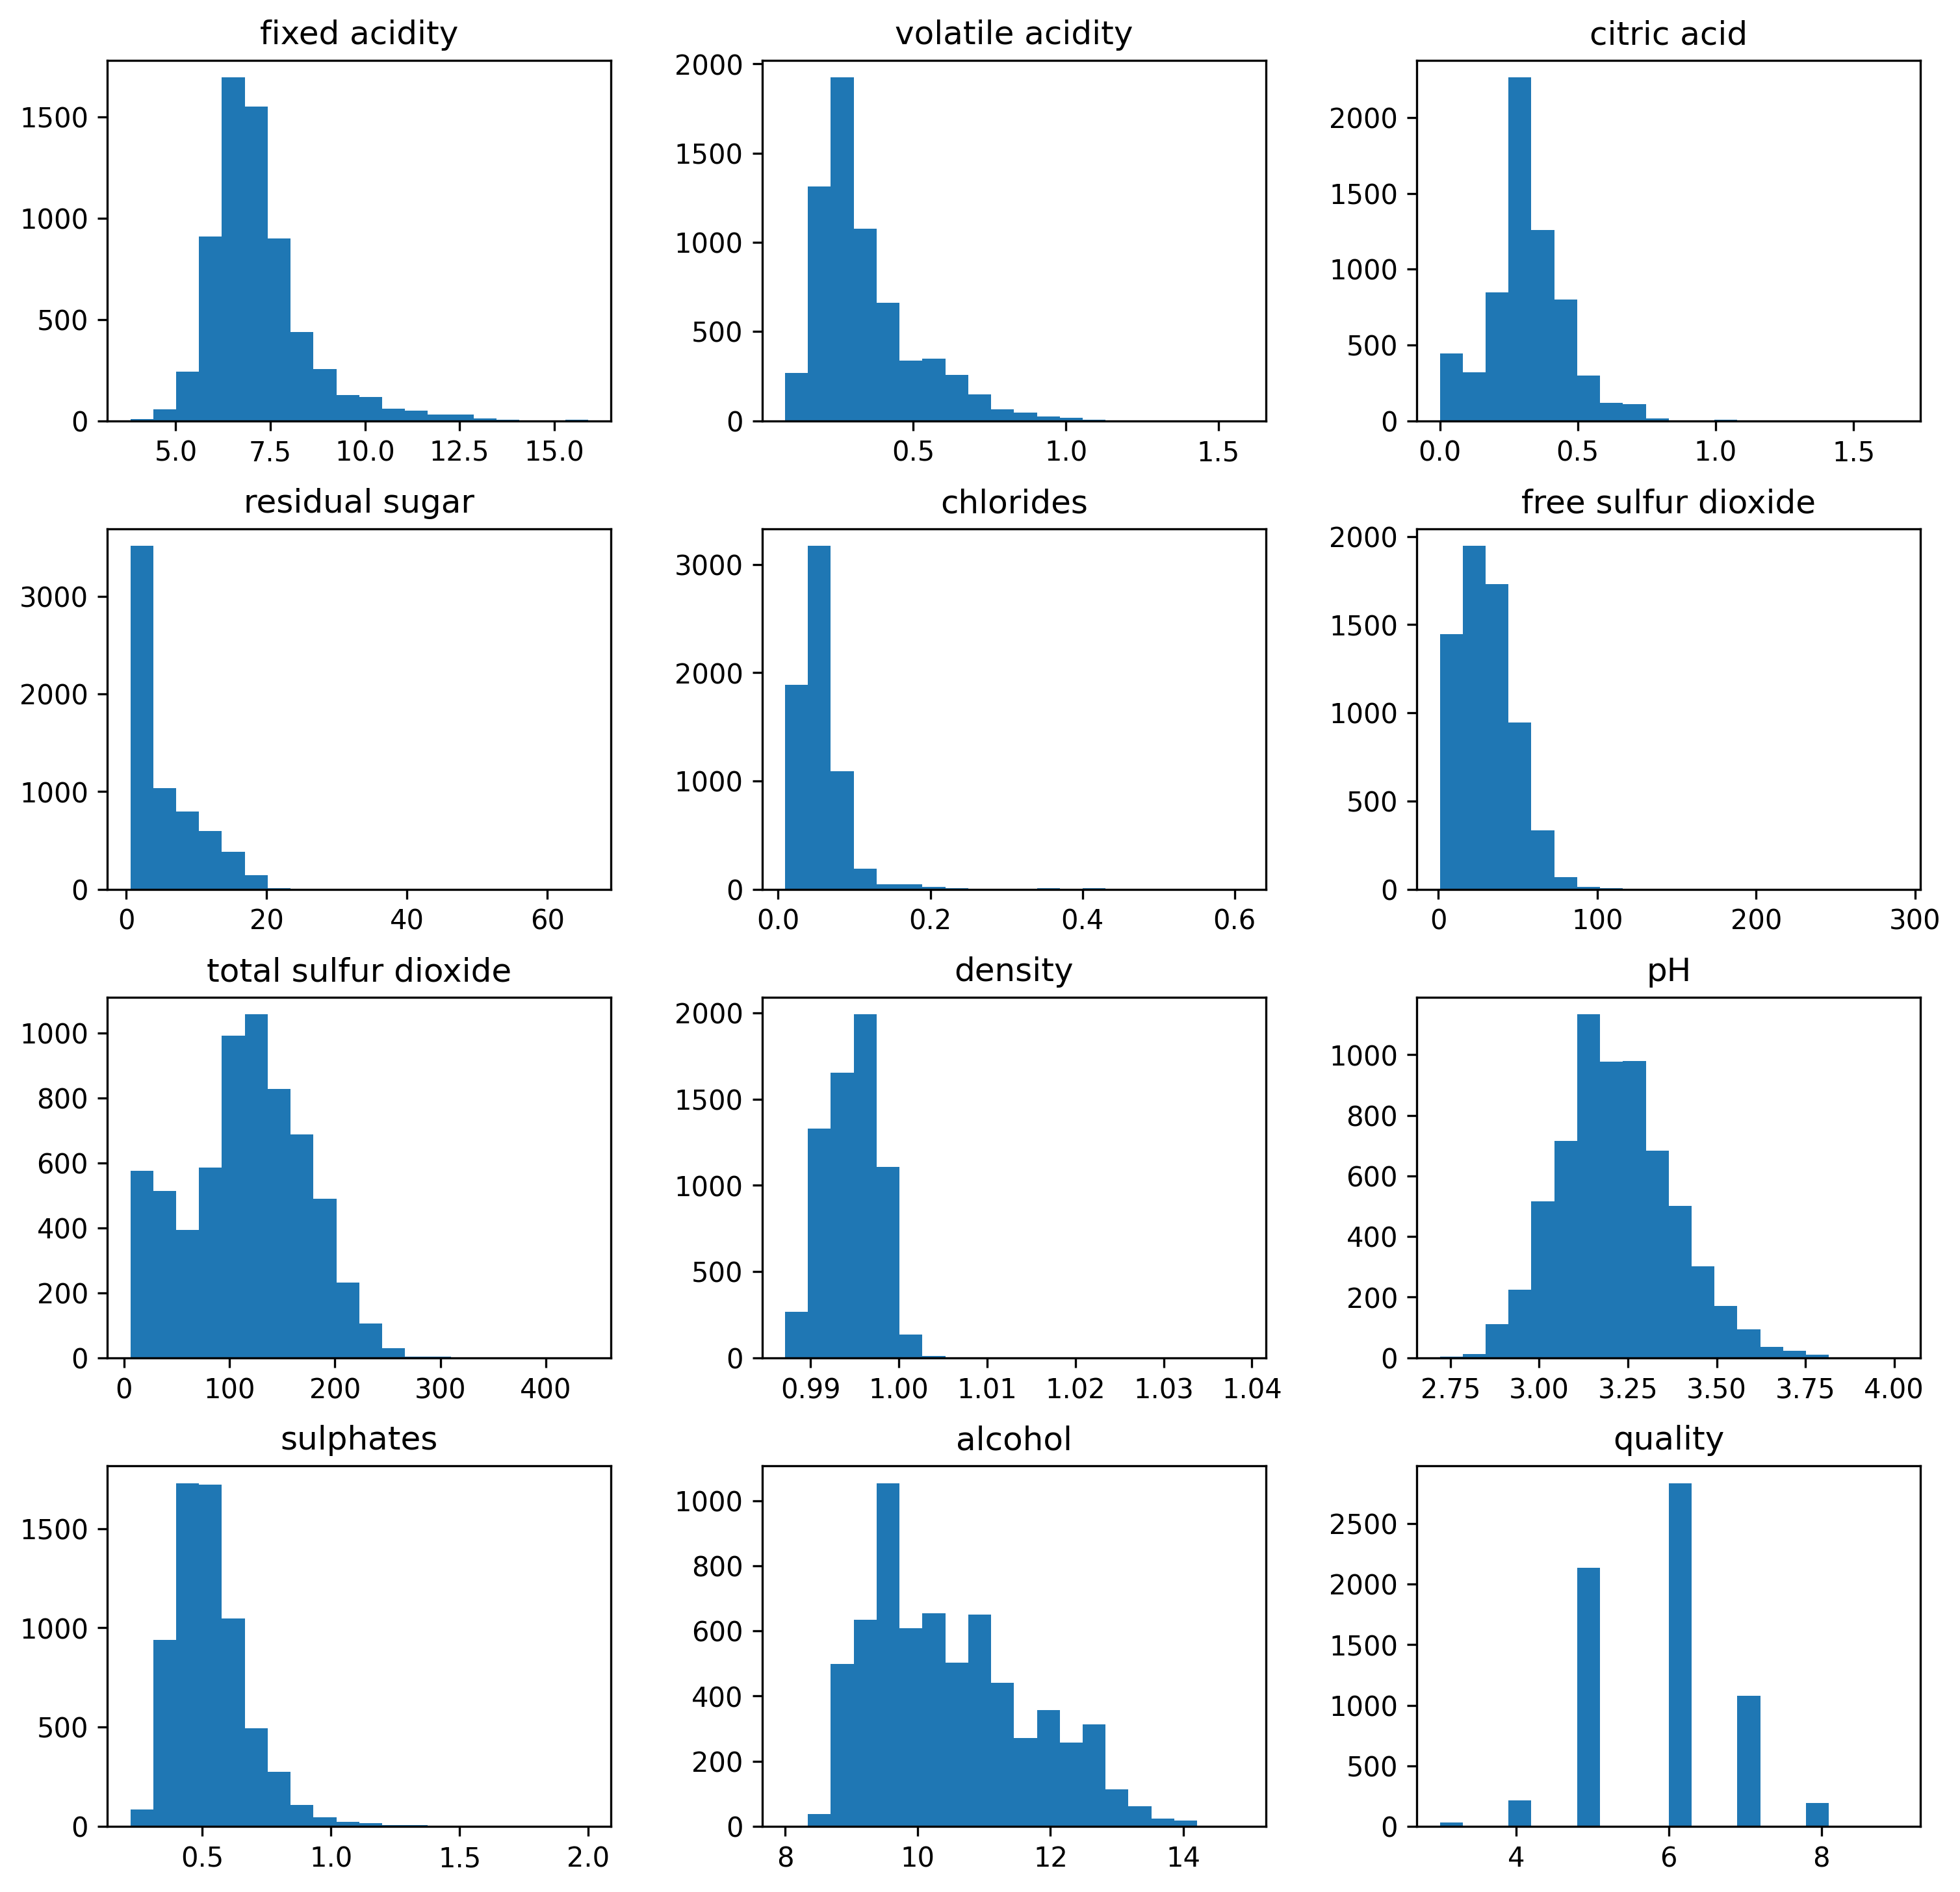

In [49]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

In [50]:
df.groupby('alcohol_cat').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
alcohol_cat,,,,,,,,,,,,
low,7.292338,0.357534,0.316695,7.230756,0.065481,33.786017,131.663842,0.996608,3.194972,0.529449,9.404379,5.456921
medium,7.267490,0.321027,0.320260,4.165464,0.051311,28.244223,104.244756,0.993864,3.238151,0.539165,10.934356,5.955208
high,6.786972,0.341813,0.319707,3.720364,0.040225,27.218310,100.798122,0.991095,3.231831,0.511244,12.645172,6.568075


In [51]:
dv = 'pH'
group = 'alcohol_cat'

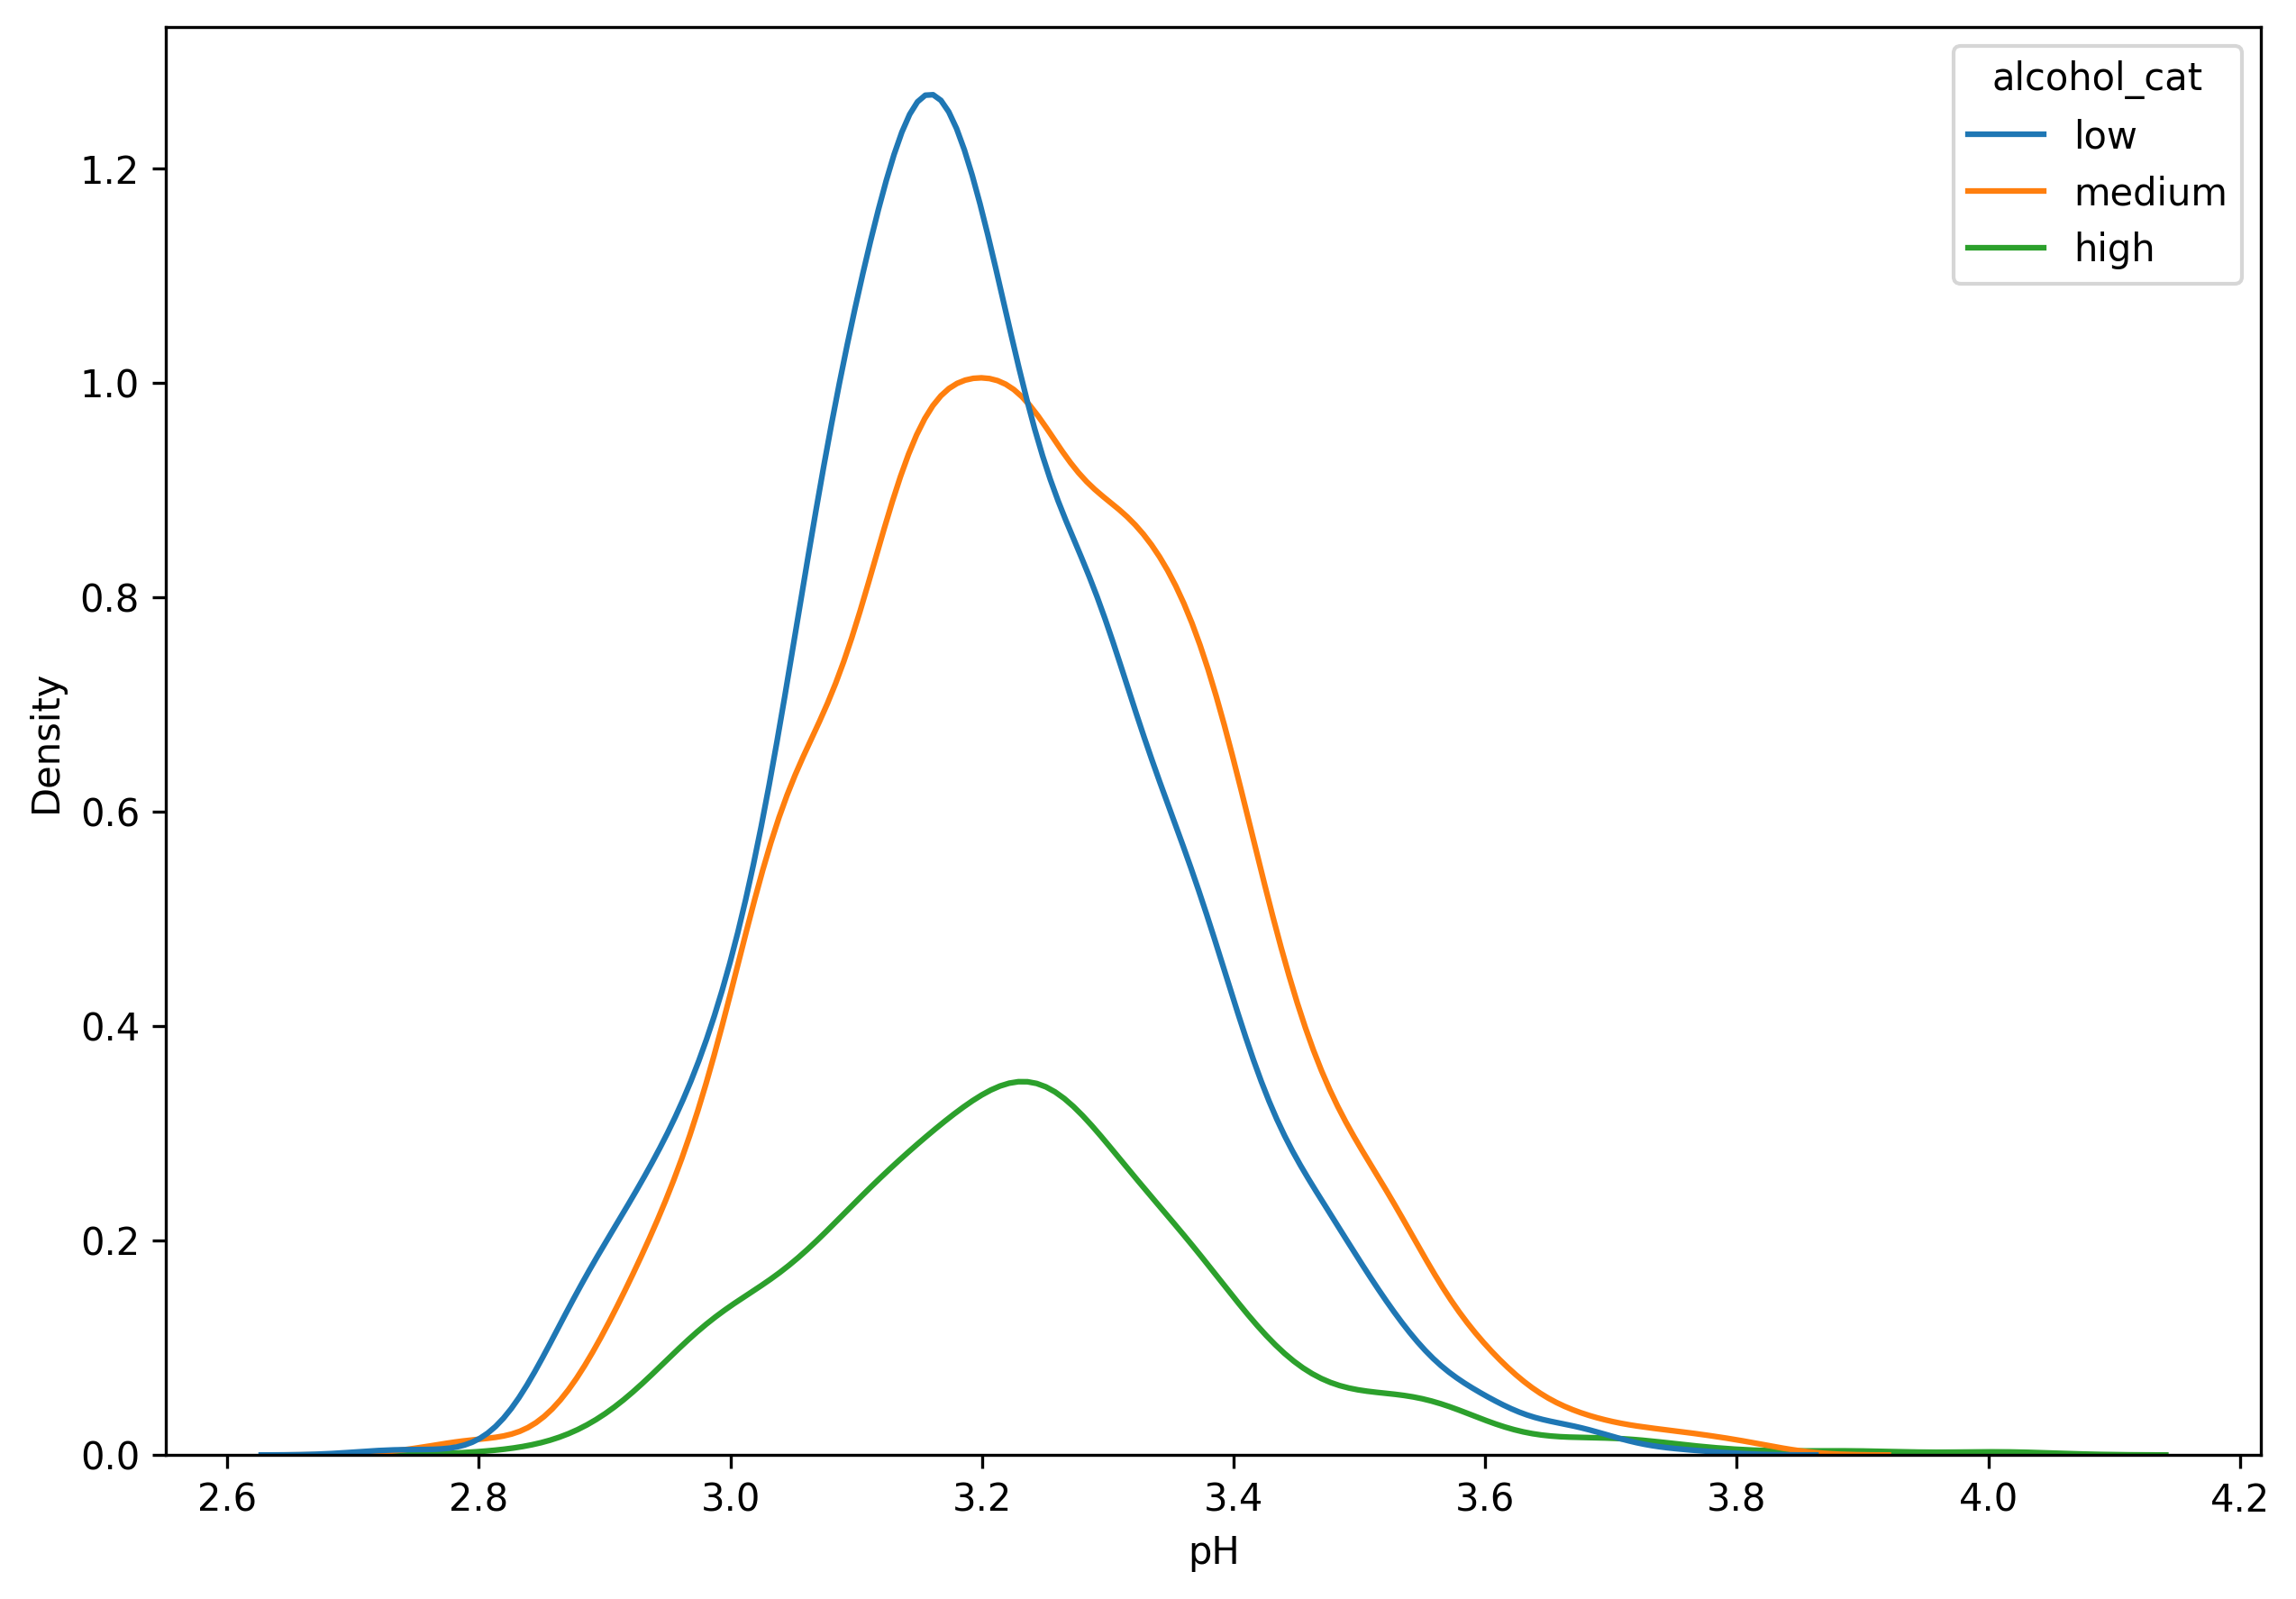

In [52]:
fig, ax = plt.subplots(figsize = (10,7))

sns.kdeplot(data = df, x = dv, hue = group)

plt.show()

In [53]:
pg.normality(df, dv = dv, group = group)

,W,pval,normal
low,0.992192,2.976695e-11,False
medium,0.994735,1.763430e-08,False
high,0.967838,9.218892e-13,False


In [105]:
pg.anova(df, dv = dv, between = group)

,Source,ddof1,ddof2,F,p-unc,np2
0,qual_cat,2,6494,113.653807,3.054841e-49,0.033819


In [106]:
pg.pairwise_tukey(df, dv = dv, between = group)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,low,medium,10.184350,10.465055,-0.280706,0.076263,-3.680754,6.858535e-04,-0.239369
1,low,high,10.184350,11.691414,-1.507065,0.111950,-13.461979,3.596012e-13,-1.283105
2,medium,high,10.465055,11.691414,-1.226359,0.084681,-14.482019,3.596012e-13,-1.045764
